In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline
import seaborn as sb

In [14]:
bikeshare = pd.read_csv('bikeshare_reduced.csv', 
                        parse_dates=['Start date', 'End date', 'start_date_short', 'end_date_short'], 
                        index_col='Start date')

In [15]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1538148 entries, 2011-03-31 23:58:00 to 2012-03-31 23:59:00
Data columns (total 19 columns):
Unnamed: 0          1538148 non-null int64
Duration            1538148 non-null object
End date            1538148 non-null datetime64[ns]
Start station       1538148 non-null object
End station         1538148 non-null object
Member Type         1538148 non-null object
start_date_short    1538148 non-null datetime64[ns]
end_date_short      1538148 non-null datetime64[ns]
time_diff           1538148 non-null float64
season              1538148 non-null int64
mnth                1538148 non-null int64
holiday             1538148 non-null int64
weekday             1538148 non-null int64
workingday          1538148 non-null int64
weathersit          1538148 non-null int64
temp                1538148 non-null float64
atemp               1538148 non-null float64
hum                 1538148 non-null float64
windspeed           1538148 non-null floa

In [16]:
bikeshare_4d = bikeshare['time_diff'].resample('4D').mean()
bikeshare_4d.head()

Start date
2011-01-01 00:01:00    12.292627
2011-01-05 00:01:00    11.247343
2011-01-09 00:01:00    10.513035
2011-01-13 00:01:00    11.829927
2011-01-17 00:01:00    11.224700
Freq: 4D, Name: time_diff, dtype: float64

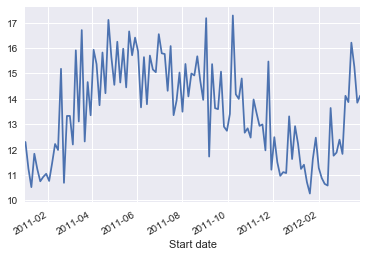

In [17]:
bikeshare_4d.plot()
plt.show()

In [5]:
bikeshare_count = bikeshare['mnth'].resample('1W').count()
bikeshare_count.head()

Start date
2011-01-02    1648
2011-01-09    9173
2011-01-16    8769
2011-01-23    8619
2011-01-30    7569
Freq: W-SUN, Name: mnth, dtype: int64

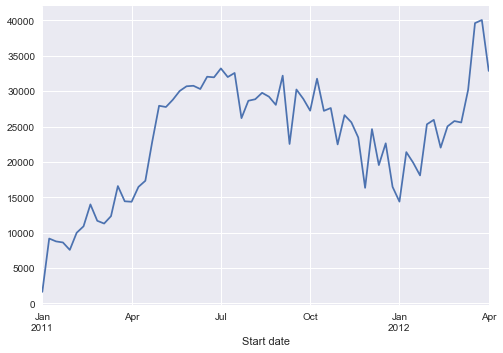

In [6]:
bikeshare_count.plot()

In [7]:
bikeshare_reg = bikeshare[bikeshare['Member Type'] == 'Registered']
bikeshare_cas = bikeshare[bikeshare['Member Type'] == 'Casual']

In [8]:
bikeshare_count_reg = bikeshare_reg.groupby(['start_date_short'])['mnth'].count()
bikeshare_count_cas = bikeshare_cas.groupby(['start_date_short'])['mnth'].count()

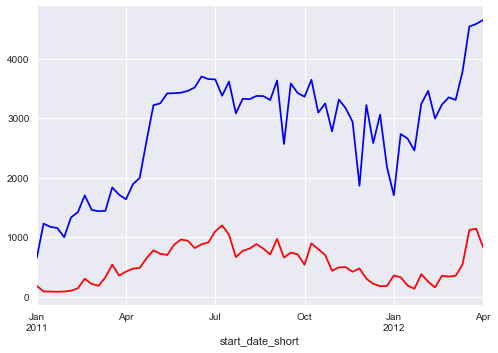

In [9]:
bikeshare_count_reg.resample('1W').mean().plot(c='blue')
bikeshare_count_cas.resample('1W').mean().plot(c='red')

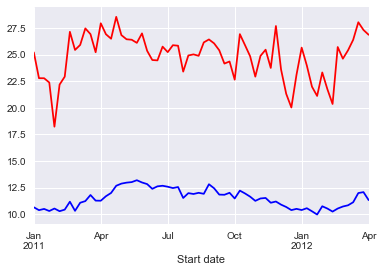

In [18]:
bikeshare_reg['time_diff'].resample('1W').mean().plot(c='blue')
bikeshare_cas['time_diff'].resample('1W').mean().plot(c='red')

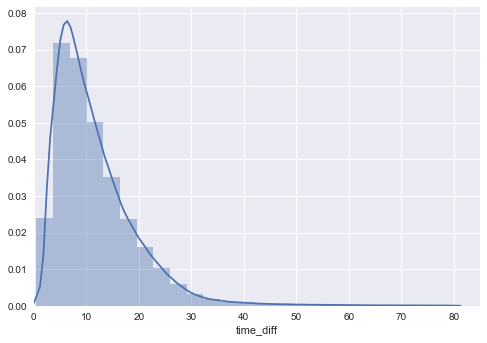

In [11]:
sb.distplot(bikeshare_reg['time_diff'], bins=25)
plt.xlim([0,85])
plt.show()

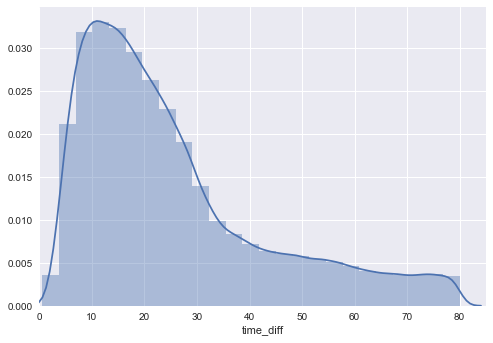

In [12]:
sb.distplot(bikeshare_cas['time_diff'], bins=25)
plt.xlim([0,85])
plt.show()